Libraries


In [1]:
import matplotlib.pyplot as plt

# Reading datasets
import pandas as pd

# For creating multidimensional array
import numpy as np

# Visualization of data
import seaborn as sns
%matplotlib inline

Data

In [2]:
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2023-01-19 01:28:02--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat [following]
--2023-01-19 01:28:03--  https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat          100%[===================>]  33.19M  2.11MB/s    in 13s     

2023-01-19 01:28:16 (2.54 MB/s) - ‘PaviaU.mat’ saved [34806917/34806917]

URL transformed to HTTPS due to an HSTS policy
--2023-01-19 01:28:16--  https://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 

In [3]:
!ls

PaviaU_gt.mat  PaviaU.mat  sample_data


Convert data to csv

X shape: (610, 340, 103)
y shape: (610, 340)


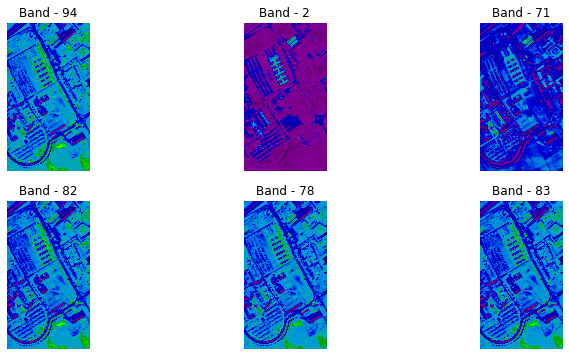

In [4]:
import pandas as pd
import numpy as np
from scipy.io import loadmat

def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)


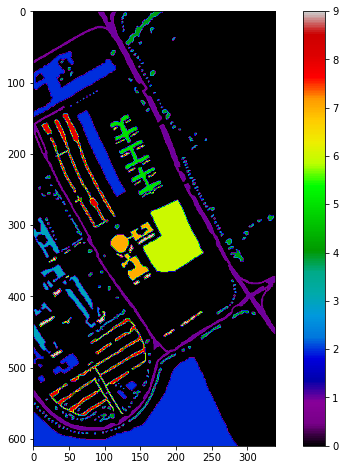

In [5]:
#Visualzing growth truth
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('on')
plt.show()

In [6]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [8]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,...,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,...,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,145.000000,146.000000,150.000000,140.000000,0.000000,134.000000,0.000000
25%,649.000000,555.000000,483.000000,473.000000,480.000000,474.000000,461.000000,444.000000,433.000000,430.000000,...,1696.000000,1699.000000,1693.000000,1690.000000,1696.000000,1692.000000,1685.000000,1675.000000,1682.000000,1692.000000
50%,857.000000,762.000000,694.000000,690.000000,693.000000,681.000000,671.000000,661.000000,657.000000,658.000000,...,2246.000000,2252.000000,2244.000000,2236.000000,2238.000000,2235.000000,2231.000000,2226.000000,2244.000000,2261.000000
75%,1111.000000,1046.000000,1015.000000,1036.000000,1058.000000,1066.000000,1068.000000,1064.000000,1066.000000,1080.000000,...,2724.000000,2730.000000,2721.000000,2711.000000,2701.000000,2688.000000,2683.000000,2677.000000,2692.000000,2715.000000
max,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000


PCA Visualization

In [9]:
from sklearn.preprocessing import StandardScaler


In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data = scaler.transform(df)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 75)
pca.fit(scaled_data)
principalComponents = pca.fit_transform(scaled_data)


In [13]:
scaled_data.shape
#(No.of components,features)

(207400, 104)

In [14]:
principalComponents.shape

(207400, 75)

[0.6423205  0.92415281 0.97506984 0.98461368 0.98955906 0.99207859
 0.99417898 0.99587709 0.99692853 0.99754693 0.99798162 0.99827018
 0.99847512 0.99866338 0.9988097  0.99893687 0.99903334 0.99910948
 0.99918274 0.99924738 0.99930485 0.99935947 0.99940513 0.99944761
 0.99948612 0.99951926 0.99955128 0.99957691 0.99960097 0.99962402
 0.99964637 0.99966704 0.99968676 0.99970546 0.99972241 0.99973855
 0.99975447 0.99976973 0.99978422 0.9997983  0.99981091 0.99982276
 0.99983349 0.99984412 0.99985394 0.99986359 0.99987266 0.99988094
 0.999889   0.99989686 0.99990393 0.99991067 0.99991688 0.99992272
 0.9999282  0.99993348 0.99993846 0.99994288 0.99994724 0.99995135
 0.99995523 0.99995875 0.99996195 0.99996507 0.99996769 0.99997024
 0.9999727  0.99997487 0.99997695 0.99997887 0.99998065 0.99998222
 0.99998366 0.999985   0.99998631]


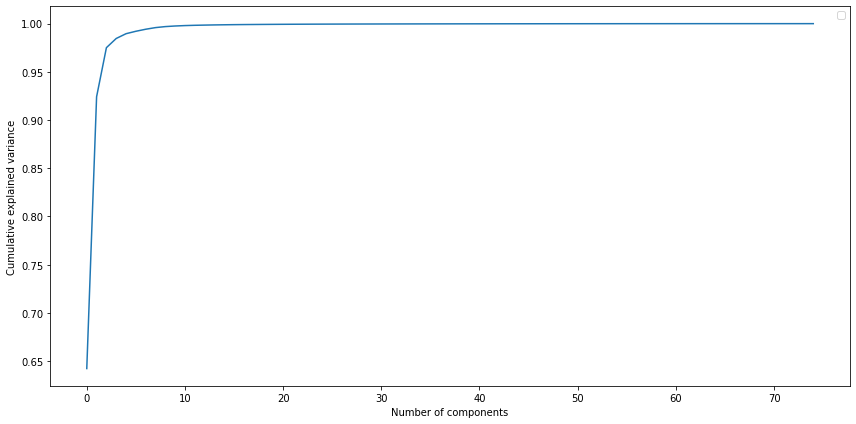

In [15]:
ev=pca.explained_variance_ratio_
plt.figure(figsize=(12, 6))
cum_sum_exp = np.cumsum(ev)
print(cum_sum_exp)
plt.plot(cum_sum_exp)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
pca = PCA(n_components = 8)
dt = pca.fit_transform(scaled_data)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,9)]+['class']

In [17]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,class
0,-8.651886,7.381463,2.582276,0.459393,0.365887,0.457213,-1.297280,-0.138952,0
1,-9.329073,2.954393,2.369249,0.419543,0.177346,0.159062,-0.914648,0.305509,0
2,-10.589435,0.374331,2.256174,0.441964,0.462047,0.292879,-0.816793,-0.343876,0
3,-10.036690,3.225673,1.940326,0.456364,0.690526,0.409693,-0.737049,0.245834,0
4,-9.734035,1.823060,1.688965,0.367539,0.160748,-0.152564,-0.388779,0.105022,0


In [18]:
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC-1    207400 non-null  float64
 1   PC-2    207400 non-null  float64
 2   PC-3    207400 non-null  float64
 3   PC-4    207400 non-null  float64
 4   PC-5    207400 non-null  float64
 5   PC-6    207400 non-null  float64
 6   PC-7    207400 non-null  float64
 7   PC-8    207400 non-null  float64
 8   class   207400 non-null  uint8  
dtypes: float64(8), uint8(1)
memory usage: 12.9 MB


In [19]:
q.iloc[:, :-1].describe()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
count,207400.000000,2.074000e+05,2.074000e+05,2.074000e+05,2.074000e+05,2.074000e+05,2.074000e+05,2.074000e+05
mean,0.000000,1.490975e-16,5.371895e-17,-6.687461e-17,2.535206e-17,1.671865e-17,-1.644458e-17,1.507419e-17
std,8.173228,5.413936e+00,2.301173e+00,9.962751e-01,7.171624e-01,5.118918e-01,4.673765e-01,4.202433e-01
min,-15.035808,-1.840238e+01,-2.654830e+01,-4.993576e+00,-9.931375e+00,-8.756325e+00,-1.290806e+01,-1.107820e+01
25%,-4.763254,-3.872428e+00,-1.145554e+00,2.259014e-01,-4.436097e-01,-3.025527e-01,-2.406491e-01,-2.563567e-01
50%,-1.356663,-2.304311e-02,-1.883017e-01,3.422796e-01,-1.353181e-02,-8.431265e-03,-1.837665e-02,2.139876e-03
75%,3.056825,2.990070e+00,9.781964e-01,4.345894e-01,4.289384e-01,2.930088e-01,2.796786e-01,2.573044e-01
max,85.839899,3.720131e+01,3.476479e+01,5.894997e+00,3.905181e+01,3.046943e+01,2.624116e+01,1.254642e+01


Display bands after PCA

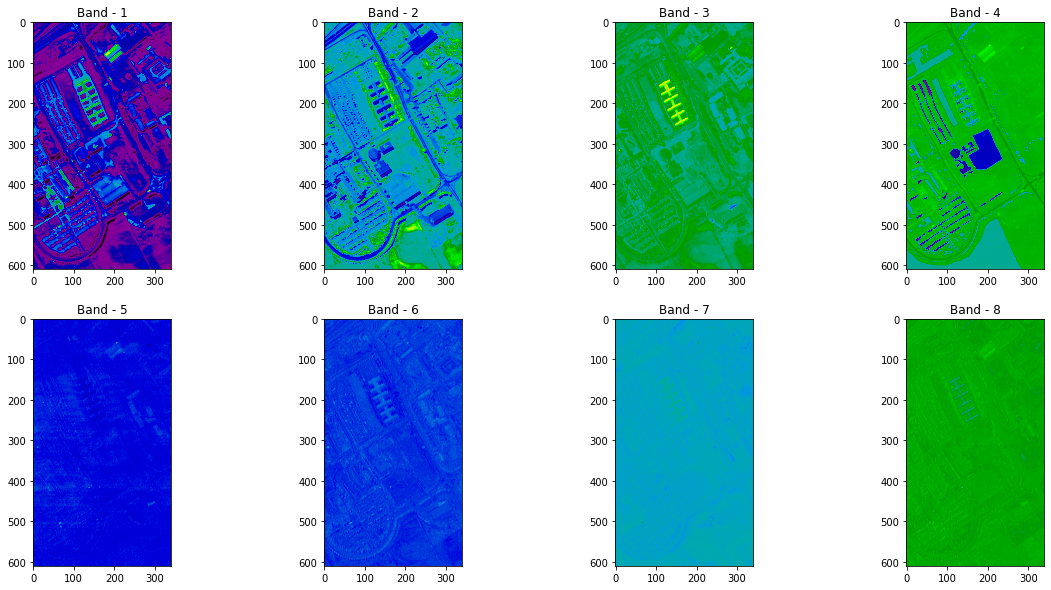

In [20]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 9):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(610, 340), cmap='nipy_spectral')
    plt.axis('on')
    plt.title(f'Band - {i}')